# **Kaggle House Prices**

# About Dataset
## Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

## Citation
Anna Montoya, DataCanary. (2016). House Prices - Advanced Regression Techniques. Kaggle. https://kaggle.com/competitions/house-prices-advanced-regression-techniques

# Download Dataset

In [ ]:
# Install Kaggle API
! pip install kaggle


In [ ]:
!mkdir ~/.kaggle

# Create API token
# Enter username and API key
with open("/root/.kaggle/kaggle.json", "w+") as f:
  f.write('{"username":"Enter your username","key": "Enter your API key"}')

!chmod 600 ~/.kaggle/kaggle.json # Set permissions

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 15.9MB/s]


In [ ]:
! mkdir house-prices-advanced-regression-techniques
! unzip house-prices-advanced-regression-techniques.zip -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: house-prices-advanced-regression-techniques/train.csv  


# Exploring the data

Inspired by Gusthema's Notebook (Competition Winner)

In [ ]:
import pandas as pd
train_dataset_example = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
train_dataset_example.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_dataset_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Drop ID
train_dataset_example = train_dataset_example.drop('Id', axis=1)
train_dataset_example.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

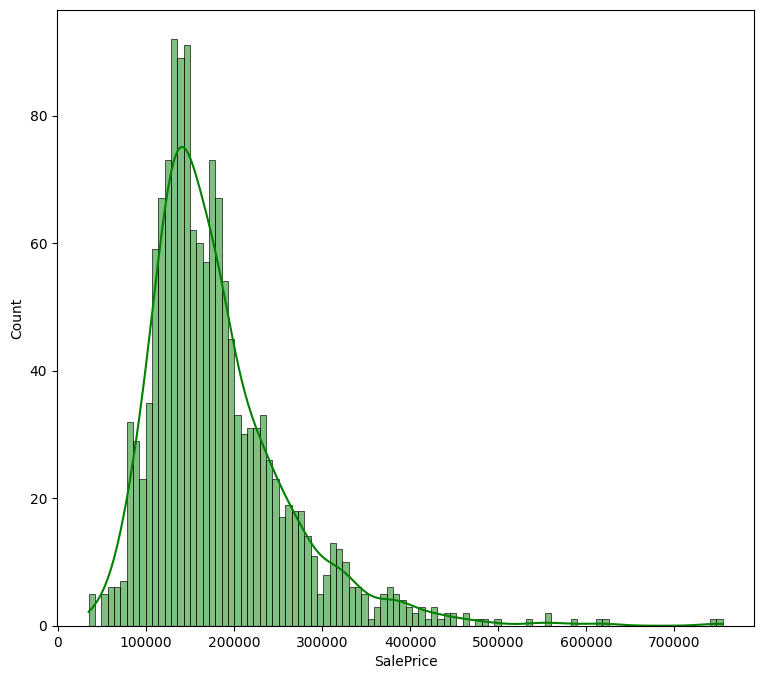

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Distribution
print(train_dataset_example['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(train_dataset_example['SalePrice'], color='g', bins=100, kde=True)


# House_Prices_Dataset Class

### Preprocessing

In [ ]:
import pandas as pd
def preprocess_data(df, train = True):

  if train:
    # Drop rows where the target column 'SalePrice' is missing
    df = df.dropna(subset=['SalePrice'])

  # List of categorical features to apply one-hot encoding
  categorical_features = [
      'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
      'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
      'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
      'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
      'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
      'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
      'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
      'SaleType', 'SaleCondition'
  ]

  # Fill missing values for categorical columns (e.g., with 'None' or 'Unknown')
  df[categorical_features] = df[categorical_features].fillna('None')

  # One-hot encode the categorical features
  df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

  # Fill missing values for numerical columns (with the median for example)
  df.fillna(df.median(), inplace=True)

  return df



In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, Sampler
class House_Prices_Train_Dataset(object):

  def __init__(self, filepath):
    # Convert to NumPy
    df = pd.read_csv(filepath)
    df = preprocess_data(df)
    df = df.drop('Id', axis=1)
    self.x = df.loc[:, df.columns != 'SalePrice'].values.astype(np.float32) # To avoid object data type
    self.y = df.loc[:, 'SalePrice'].values
    self.x = torch.from_numpy(self.x)
    self.y = torch.tensor(self.y, dtype = torch.float32)

    # Normalization
    mean_x = self.x.mean(dim=0)
    std_x = self.x.std(dim=0)
    self.x = (self.x - mean_x) / std_x
    self.y = (self.y - self.y.mean()) / self.y.std()

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

class House_Prices_Test_Dataset(object):

  def __init__(self, filepath):
    df = pd.read_csv(filepath)
    df = preprocess_data(df, train = False)
    df = df.drop('Id', axis=1)
    self.x = df.values.astype(np.float32) # To avoid object data type
    self.x = torch.from_numpy(self.x)

    # Normalization
    mean_x = self.x.mean(dim=0)
    std_x = self.x.std(dim=0)
    self.x = (self.x - mean_x) / std_x

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    return self.x[index]


# Implementation

In [ ]:
train_dataset = House_Prices_Train_Dataset('/content/house-prices-advanced-regression-techniques/train.csv')
test_dataset = House_Prices_Test_Dataset('/content/house-prices-advanced-regression-techniques/test.csv')


In [ ]:
print(type(train_dataset[0][0]))
print()
print(type(train_dataset[0][1]))
print(train_dataset[0][1])
print()
print(type(test_dataset[0]))
print()
print(train_dataset[0][0].shape) # 1D array with 273 features (Input)
print()
print(train_dataset[0][1].shape) # Scalar matrix 0D
print(train_dataset.y.shape) # Number of sale prices that is 1460
print()
print(test_dataset[0].shape) # 1D array with 262 features (Input)

<class 'torch.Tensor'>

<class 'torch.Tensor'>
tensor(0.3472)

<class 'torch.Tensor'>

torch.Size([273])

torch.Size([])
torch.Size([1460])

torch.Size([262])


# Designing MLP Architechture

In [ ]:
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(273, 135),
            nn.ReLU(),
            nn.Linear(135, 65),
            nn.ReLU(),
            nn.Linear(65, 30),
            nn.ReLU(),
            nn.Linear(30, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = MLP().to(device)
print(model)

Using cpu device
MLP(
  (layers): Sequential(
    (0): Linear(in_features=273, out_features=135, bias=True)
    (1): ReLU()
    (2): Linear(in_features=135, out_features=65, bias=True)
    (3): ReLU()
    (4): Linear(in_features=65, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=1, bias=True)
  )
)


In [ ]:
def evaluate(data_loader, model, criterion, list_loss, list_acc, is_train=True):
    if is_train:
        model.train()
    else:
        model.eval()

    num_batches = len(data_loader)
    num_items = len(data_loader.dataset)

    total_loss = 0
    total_correct = 0

    with torch.set_grad_enabled(is_train):
        for data, target in data_loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()

            # Count Deviations of <= 0.5 from normalized target value as correct.
            total_correct += (abs(torch.argmax(output, dim=1) - target) <= 0.5).sum().item()

            if is_train:
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

    avg_loss = total_loss / num_batches
    accuracy = total_correct / num_items

    list_loss.append(avg_loss)
    list_acc.append(accuracy)
    if is_train:

      print(f"Average loss: {avg_loss:.7f}, accuracy: {accuracy:.2%}")

    else:
      print(f"Test Average loss: {avg_loss:.7f}, accuracy: {accuracy:.2%}")

def train(data_loader, model, criterion, optimizer, loss, acc):
    evaluate(data_loader, model, criterion, loss, acc, is_train=True)

def test(data_loader, model, criterion, loss, acc):
    evaluate(data_loader, model, criterion, loss, acc, is_train=False)

In [ ]:
# Cross Entropy Loss Function and Adam Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
for X, y in train_dataloader:
    print(f"Shape of X_train [N, C, H, W]: {X.shape}")
    print(f"Shape of y_train: {y.shape} {y.dtype}")
    break

Shape of X_train [N, C, H, W]: torch.Size([64, 3, 256, 256])
Shape of y_train: torch.Size([64]) torch.int64


In [ ]:
%%time

epochs = 50
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for epoch in range(epochs):
    print(f"Training epoch: {epoch+1}")
    train(train_dataloader, model, criterion, optimizer, train_loss, train_acc)

Training epoch: 1
Average loss: 0.9993868, accuracy: 41.58%
Training epoch: 2
Average loss: 1.0064770, accuracy: 41.58%
Training epoch: 3


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Average loss: 0.9981386, accuracy: 41.58%
Training epoch: 4
Average loss: 1.0036191, accuracy: 41.58%
Training epoch: 5
Average loss: 1.0011484, accuracy: 41.58%
Training epoch: 6
Average loss: 0.9983764, accuracy: 41.58%
Training epoch: 7
Average loss: 1.0040485, accuracy: 41.58%
Training epoch: 8
Average loss: 0.9976185, accuracy: 41.58%
Training epoch: 9
Average loss: 0.9982989, accuracy: 41.58%
Training epoch: 10
Average loss: 0.9952619, accuracy: 41.58%
Training epoch: 11
Average loss: 0.9993257, accuracy: 41.58%
Training epoch: 12
Average loss: 1.0024953, accuracy: 41.58%
Training epoch: 13
Average loss: 1.0036225, accuracy: 41.58%
Training epoch: 14
Average loss: 1.0003179, accuracy: 41.58%
Training epoch: 15
Average loss: 0.9966623, accuracy: 41.58%
Training epoch: 16
Average loss: 0.9983557, accuracy: 41.58%
Training epoch: 17
Average loss: 1.0032180, accuracy: 41.58%
Training epoch: 18
Average loss: 1.0007886, accuracy: 41.58%
Training epoch: 19
Average loss: 1.0080199, accur

# Plotting Results

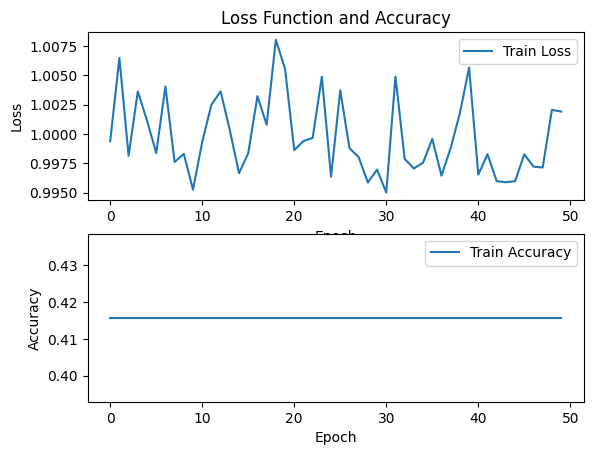

Final Train Accuracy: 41.58%


In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(train_loss, label='Train Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Function and Accuracy')
ax1.legend()

ax2.plot(train_acc, label='Train Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

print(f"Final Train Accuracy: {train_acc[-1]:.2%}")